# Working with Time Series Data Exercises
### Kwame Taylor
**Oct 27th, 2020**

> For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

In [20]:
import warnings
warnings.filterwarnings("ignore")

from vega_datasets import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# default viz settings
plt.rc('figure', figsize=(10, 8))
plt.rc('font', size=14)
plt.rc('lines', linewidth=2, c='m')

## San Francisco Temperature Data

In [4]:
df = data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. **Bonus:** Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [5]:
# first I need to set the date as the index
df = df.set_index('date').sort_index()
df.head(3)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9


**1. Resample by the day and take the average temperature. Visualize the average temperature over time.**

In [22]:
day_avg = df.resample('D').mean()
day_avg.head(3)

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667


Text(0.5, 1.0, 'Avg. Temp. Daily')

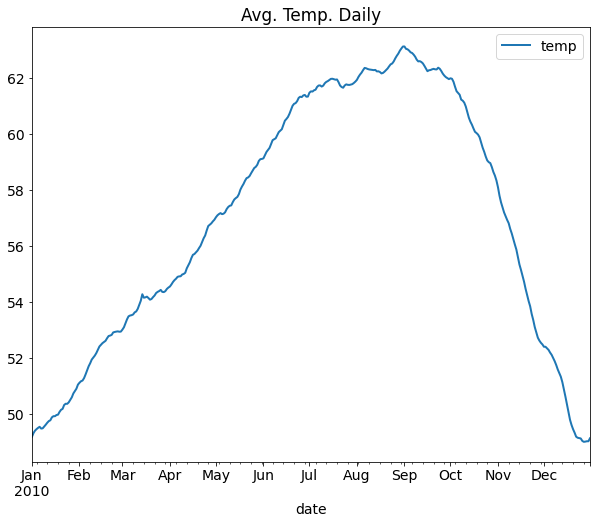

In [34]:
day_avg.plot()
plt.title('Avg. Temp. Daily')

**2. Write the code necessary to visualize the minimum temperature over time.**

In [35]:
month_min = df.resample('M').min()
month_min.head(3)

,temp
date,
2010-01-31,45.8
2010-02-28,46.9
2010-03-31,48.7


Text(0.5, 1.0, 'Minimum Temp. by Month')

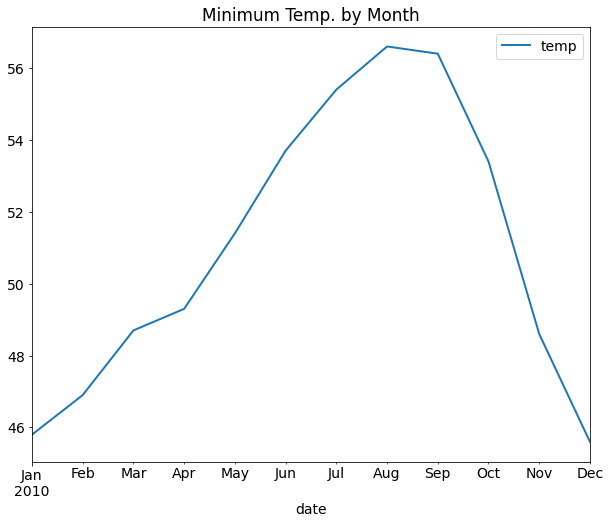

In [36]:
month_min.plot()
plt.title('Minimum Temp. by Month')

**3. Write the code necessary to visualize the maximum temperature over time.**

In [43]:
month_max = df.resample('M').max()
month_max.head(3)

,temp
date,
2010-01-31,56.2
2010-02-28,58.6
2010-03-31,61.3


Text(0.5, 1.0, 'Maximum Temp. by Month')

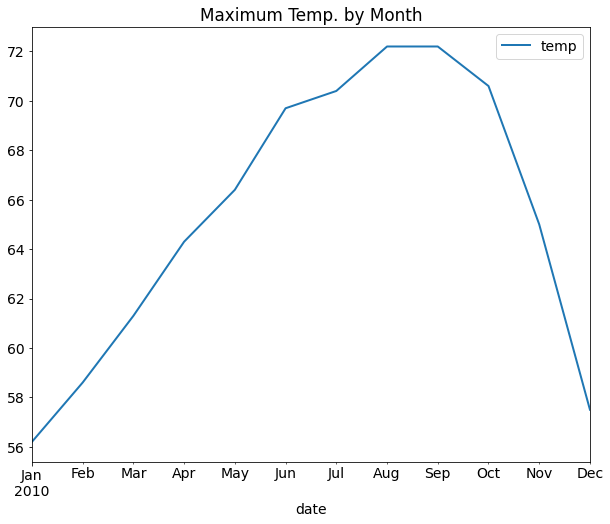

In [44]:
month_max.plot()
plt.title('Maximum Temp. by Month')

**4. Which month is the coldest, on average?**

In [47]:
month_avg = df.resample('M').mean()
#month_avg.max()
month_avg

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


January!

**5. Which month has the highest average temperature?**

In [49]:
#month_avg.max()
month_avg

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


September!

**6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?**

In [52]:
by_day = df.resample('D').agg(['min', 'max'])
by_day.head(3)

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5

In [54]:
by_day['temp_change'] = by_day.temp['max'] - by_day.temp['min']
by_day.head(3)

temp       temp_change
             min   max            
date                              
2010-01-01  45.8  53.3         7.5
2010-01-02  46.0  53.4         7.4
2010-01-03  46.1  53.5         7.4

In [56]:
by_month = by_day.resample('M').mean()
by_month

temp            temp_change
                  min        max            
date                                        
2010-01-31  46.309677  54.651613    8.341935
2010-02-28  48.064286  57.550000    9.485714
2010-03-31  49.238710  60.093548   10.854839
2010-04-30  50.326667  62.646667   12.320000
2010-05-31  52.403226  65.312903   12.909677
2010-06-30  54.480000  68.430000   13.950000
2010-07-31  56.045161  70.022581   13.977419
2010-08-31  56.941935  70.812903   13.870968
2010-09-30  56.903333  71.306667   14.403333
2010-10-31  54.932258  68.364516   13.432258
2010-11-30  50.776667  61.013333   10.236667
2010-12-31  47.025806  54.951613    7.925806

July has the highest variability in temperature.

## Seattle Weather Data

In [ ]:
data.seattle_weather()

Use the dataset to answer the following questions:

* Which year and month combination has the highest amount of precipitation?
* Visualize the amount of monthly precipitation over time.
* Visualize the amount of wind over time. Choose a time interval you think is appropriate.
* Which year-month combination is the windiest?
* What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
* In which month does it rain the most?
* Which month has the most number of days with a non-zero amount of precipitation?

## Flights Data

In [ ]:
data.flights_20k()

* Convert any negative delays to 0.
* Which hour of the day has the highest average delay?
* Does the day of the week make a difference in the delay amount?
* Does the month make a difference in the delay amount?